In [1]:
#import libraries

from bs4 import BeautifulSoup
import requests
import time
import datetime


In [2]:
url = "https://www.amazon.com/Jordan-Womens-DC0774-Black-University/dp/B09S19KQBP/ref=sr_1_14?crid=256ERKW2OH8J9&keywords=nike%2Bsb%2Bdunk%2Blow&qid=1679068445&sprefix=nike%2Bsb%2Caps%2C401&sr=8-14&th=1&psc=1"

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}


In [3]:
#get the webpage

page = requests.get(url, headers=headers)

In [4]:
#tell BeautifulSoup where to get the data

soup1 =  BeautifulSoup(page.content,"html.parser")

<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){retu
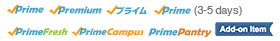

In [7]:
#display inhtml nested stucture

soup2 =  BeautifulSoup(soup1.prettify(),"html.parser")
print(soup2)

In [8]:
#Look at title

title = soup2.title
title

<title>
     Amazon.com | Jordan Womens WMNS Air Jordan 1 Low DC0774 041 Black/University Blue - Size 6.5W | Fashion Sneakers
    </title>

In [9]:
#find brand by id

brand = soup2.find(id = 'bylineInfo').text.strip()[7:]     #[7:] because it will be put in excel
print(brand)

Nike


In [10]:
#find name by id

name = soup2.find(id = 'productTitle').text.strip()
print(name)

Nike Women's Air Jordan 1 Low UNC Basketball Shoe


In [70]:
#find size 6.5 by inline style

size = soup2.find("select", {'name':'dropdown_selected_size_name'}).find("option",{"class":"dropdownSelect"})
print(size)

<option class="dropdownSelect" data-a-css-class="dropdownSelect" data-a-html-content="6.5" data-a-id="size_name_4" id="native_size_name_4" selected="" value="4,B09S19KQBP">
                   6.5
                  </option>


In [55]:
type(size)

bs4.element.ResultSet

In [72]:
size_selected = ''.join(map(str,size)).strip()
size_selected

'6.5'

In [57]:
type(size_selected)

str

In [83]:
#find color selected

options = soup2.find("select",{"name":"dropdown_selected_color_name"}).find("option",{"class":"dropdownSelect"})
options

<option class="dropdownSelect" data-a-css-class="dropdownSelect" data-a-html-content="Black/University Blue-white" data-a-id="color_name_21" id="native_color_name_21" selected="" value="21,B09S19KQBP">
                   Black/University Blue-white
                  </option>

In [84]:
type(options)

bs4.element.Tag

In [85]:
color_selected = ''.join(map(str,options)).strip()
color_selected

'Black/University Blue-white'

In [86]:
#find price by inline style

price = soup2.find('span', {'class': 'a-offscreen'}).text.strip()[1:]
print(price)

229.99


In [89]:
#Add Date time

import datetime

today = datetime.date.today()
print(today)

2023-03-21


In [90]:
#create csv file

import csv

header = ['Brand','Name','Size','Color','Price','Date']
data = [brand, name, size_selected, color_selected, price, today]

#with open('AmazonShoes.csv', 'w', newline='', encoding='UTF8') as f:
    #writer = csv.writer(f)
    #writer.writerow(header)
    #writer.writerow(data)
    
    
# **put # because if restart computer, should run all again except this part**

In [94]:
#read csv file

import pandas as pd

df = pd.read_csv(r"C:\Users\Lenovo\AmazonShoes.csv")
df

,Brand,Name,Size,Color,Price,Date
0,Nike,Nike Women's Air Jordan 1 Low UNC Basketball Shoe,6.5,Black/University Blue-white,229.99,2023-03-21
1,Nike,Nike Women's Air Jordan 1 Low UNC Basketball Shoe,6.5,Black/University Blue-white,229.99,2023-03-21


In [93]:
# appending data to the csv

with open('AmazonShoes.csv', 'a+', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)   #add only a new data

In [96]:
# make the above to be automated (don't have to run manually every morning)

#creat funtion

def check_price():
    
    url = "https://www.amazon.com/Jordan-Womens-DC0774-Black-University/dp/B09S19KQBP/ref=sr_1_14?crid=256ERKW2OH8J9&keywords=nike%2Bsb%2Bdunk%2Blow&qid=1679068445&sprefix=nike%2Bsb%2Caps%2C401&sr=8-14&th=1&psc=1"

    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page = requests.get(url, headers=headers)
    
    soup1 =  BeautifulSoup(page.content,"html.parser")
    
    soup2 =  BeautifulSoup(soup1.prettify(),"html.parser")
    
    brand = soup2.find(id = 'bylineInfo').text.strip()[7:]     #[7:] because it will be put in excel
    
    name = soup2.find(id = 'productTitle').text.strip()
    
    size = soup2.find("select", {'name':'dropdown_selected_size_name'}).find("option",{"class":"dropdownSelect"})
    size_selected = ''.join(map(str,size)).strip()
    
    options = soup2.find("select",{"name":"dropdown_selected_color_name"}).find("option",{"class":"dropdownSelect"})
    color_selected = ''.join(map(str,options)).strip()
    
    
    import datetime
    
    today = datetime.date.today()
    
    
    import csv

    header = ['Brand','Name','Size','Color','Price','Date']
    data = [brand, name, size_selected, color_selected, price, today]
    
    with open('AmazonShoes.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)   #add only a new data
    
    # if want to send email
    
    #if(price < 14):    #to send email when price below 14
    #send_mail()


In [ ]:
#check time

while(True):
    check_price()
    time.sleep(86400)  #normally every 5 sec it will run through the entire process  (if 1 day: 86400 = 60x60x24 /1day)

In [98]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Lenovo\AmazonShoes.csv")
df

,Brand,Name,Size,Color,Price,Date
0,Nike,Nike Women's Air Jordan 1 Low UNC Basketball Shoe,6.5,Black/University Blue-white,229.99,2023-03-21
1,Nike,Nike Women's Air Jordan 1 Low UNC Basketball Shoe,6.5,Black/University Blue-white,229.99,2023-03-21
2,Nike,Nike Women's Air Jordan 1 Low UNC Basketball Shoe,6.5,Black/University Blue-white,229.99,2023-03-21
3,Nike,Nike Women's Air Jordan 1 Low UNC Basketball Shoe,6.5,Black/University Blue-white,229.99,2023-03-21
4,Nike,Nike Women's Air Jordan 1 Low UNC Basketball Shoe,6.5,Black/University Blue-white,229.99,2023-03-21


In [ ]:
def send_mail():
    server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    server.ehlo()
    #server.starttis()
    server.ehlo()
    server.login('xxxkantamanee@gmail.com', 'xxx')
    
    Subject = 'The Shoes you want is below $190! Now is your chance to buy!'
    body = "This is the moment we have been waiting for. Now is your chance to pick the shirt of your dreams. Don't miss it"
    
    msg = f"Subject: {subject}\n\n{body}"
    
    server.sendmail(
    
        'xxxkantamanee@gmail.com',
        msg
        
    )